<a href="https://colab.research.google.com/github/DarkAlexWang/ICME_Workshop_2023/blob/main/day1_demo_completed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Visualization Day 1 - Exploratory Data Analysis

## Set Up

In [ ]:
!pip install --upgrade Pillow
!pip install ydata_profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 8.7 MB/s eta 0:00:00
  Attempting uninstall: Pillow
    Found existing installation: Pillow 9.4.0
    Uninstalling Pillow-9.4.0:
      Successfully uninstalled Pillow-9.4.0


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 353.0/353.0 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 6.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.4/455.4 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 17.5 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27079 sha256=c24bc97d05adcc8c8a7d351874bef9aad4032cb18ed7d072228235f5a0b0b764
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninstall: wordcloud
    Found existing installation: wordcloud 1.8.2.2
    Uninstalling wordcloud-1.8.2.2:
      Successfully uninstalled wordcloud-1.8.2.2


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport

sns.set_theme()

## Load Data

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/tsornwanee/icme-data-visualization/main/docs/weather_anomalies_data.csv")

In [ ]:
df["date"] = pd.to_datetime(df["date"])
df.sort_values("date", inplace=True)

## A Quick Introduction to Pandas

In [ ]:
# view dataframe in notebook
df

,date,station_name,degrees_from_mean,longitude,latitude,max_temp,min_temp,type
4599,2013-01-01,ANGLETON 2 W,22.63,-95.4592,29.1572,26.7,20.0,Strong Hot
3265,2013-01-01,LOVELOCK DERBY FLD,-11.40,-118.5692,40.0681,-5.0,-19.4,Weak Cold
3936,2013-01-01,OROVADA 3 W,-17.93,-117.8389,41.5683,-5.0,-25.0,Weak Cold
1421,2013-01-01,JOHN DAY,-12.07,-118.9594,44.4233,-6.7,-16.7,Weak Cold
4824,2013-01-01,MALHEUR REFUGE HQ,-12.65,-118.8447,43.2650,-9.4,-13.3,Weak Cold
...,...,...,...,...,...,...,...,...
181,2013-12-31,HARTFORD 2 W,-34.13,-88.4114,43.3311,-18.9,-25.6,Strong Cold
766,2013-12-31,POINT COMFORT,-13.71,-96.5553,28.6575,5.6,3.9,Weak Cold
1216,2013-12-31,HART 3 WSW,-10.56,-86.4239,43.6747,-9.4,-12.2,Weak Cold
2215,2013-12-31,INTL FALLS INTL AP,-37.21,-93.3981,48.5614,-26.6,-36.0,Strong Cold


In [ ]:
# View a list of the column names in the dataframe
df.columns

Index(['date', 'station_name', 'degrees_from_mean', 'longitude', 'latitude',
       'max_temp', 'min_temp', 'type'],
      dtype='object')

In [ ]:
# view one column of dataframe (a "Series" object)
df["station_name"]

4599          ANGLETON 2 W
3265    LOVELOCK DERBY FLD
3936           OROVADA 3 W
1421              JOHN DAY
4824     MALHEUR REFUGE HQ
               ...        
181           HARTFORD 2 W
766          POINT COMFORT
1216            HART 3 WSW
2215    INTL FALLS INTL AP
4419              HOLCOMBE
Name: station_name, Length: 5000, dtype: object

### Filtering

In [ ]:
# Select only specific columns from the dataframe
df[["date", "station_name", "degrees_from_mean"]]

,date,station_name,degrees_from_mean
4599,2013-01-01,ANGLETON 2 W,22.63
3265,2013-01-01,LOVELOCK DERBY FLD,-11.40
3936,2013-01-01,OROVADA 3 W,-17.93
1421,2013-01-01,JOHN DAY,-12.07
4824,2013-01-01,MALHEUR REFUGE HQ,-12.65
...,...,...,...
181,2013-12-31,HARTFORD 2 W,-34.13
766,2013-12-31,POINT COMFORT,-13.71
1216,2013-12-31,HART 3 WSW,-10.56
2215,2013-12-31,INTL FALLS INTL AP,-37.21


In [ ]:
# filter based on column value
df.loc[df["degrees_from_mean"] > 40]

,date,station_name,degrees_from_mean,longitude,latitude,max_temp,min_temp,type
4868,2013-01-14,FAIRBANKS INTL AP,44.84,-147.8761,64.8039,2.8,-4.4,Strong Hot
332,2013-01-29,BOLIVAR 1 NE,40.54,-93.3911,37.6167,23.3,16.1,Strong Hot


In [ ]:
# Another example, filter based on column value
df.loc[df["station_name"] == "INTL FALLS INTL AP"]

,date,station_name,degrees_from_mean,longitude,latitude,max_temp,min_temp,type
29,2013-05-30,INTL FALLS INTL AP,11.46,-93.3981,48.5614,20.6,15.6,Weak Hot
2215,2013-12-31,INTL FALLS INTL AP,-37.21,-93.3981,48.5614,-26.6,-36.0,Strong Cold


### Aggregation

In [ ]:
df.mean(numeric_only=True)

degrees_from_mean    -0.868366
longitude           -97.967102
latitude             39.098464
max_temp             18.700540
min_temp              6.804860
dtype: float64

In [ ]:
df["station_name"].value_counts()

GUAM INTL AP           13
PALMDALE AP            10
BEOWAWE                 9
ABILENE RGNL AP         9
ST PETERSBURG AP        9
                       ..
PARKER RSVR             1
BUSHNELL 1 E            1
MILLINOCKET MUNI AP     1
SHARON SPRINGS          1
MANISTIQUE WWTP         1
Name: station_name, Length: 2149, dtype: int64

## A quick overview – `ydata-profiling`

In [ ]:
# Create data profile report
profile = ProfileReport(df, title="Weather Anomalies Report")

In [ ]:
# View the report in the notebook
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
# Exploring the positive longitude values/outlier longitudes
df.loc[df.longitude > 0]

,date,station_name,degrees_from_mean,longitude,latitude,max_temp,min_temp,type
1412,2013-03-17,GUAM INTL AP,2.53,144.7961,13.4836,32.2,24.4,Weak Hot
988,2013-03-30,GUAM INTL AP,3.38,144.7961,13.4836,31.7,26.1,Weak Hot
4460,2013-04-09,GUAM INTL AP,2.89,144.7961,13.4836,33.3,26.1,Weak Hot
1027,2013-04-13,GUAM INTL AP,5.11,144.7961,13.4836,32.2,26.7,Strong Hot
1111,2013-04-16,GUAM INTL AP,2.39,144.7961,13.4836,32.8,25.0,Weak Hot
603,2013-04-17,GUAM INTL AP,1.79,144.7961,13.4836,32.2,25.0,Weak Hot
1525,2013-05-14,GUAM INTL AP,4.12,144.7961,13.4836,32.2,27.8,Weak Hot
3081,2013-05-15,GUAM INTL AP,4.12,144.7961,13.4836,32.8,27.8,Weak Hot
1833,2013-06-03,GUAM INTL AP,3.38,144.7961,13.4836,32.8,27.2,Weak Hot
2338,2013-06-29,GUAM INTL AP,3.38,144.7961,13.4836,32.2,27.2,Weak Hot


## Pair Plots

Plot the correlation between columns in a dataframe.

[Documentation (seaborn)](https://seaborn.pydata.org/generated/seaborn.pairplot.html)

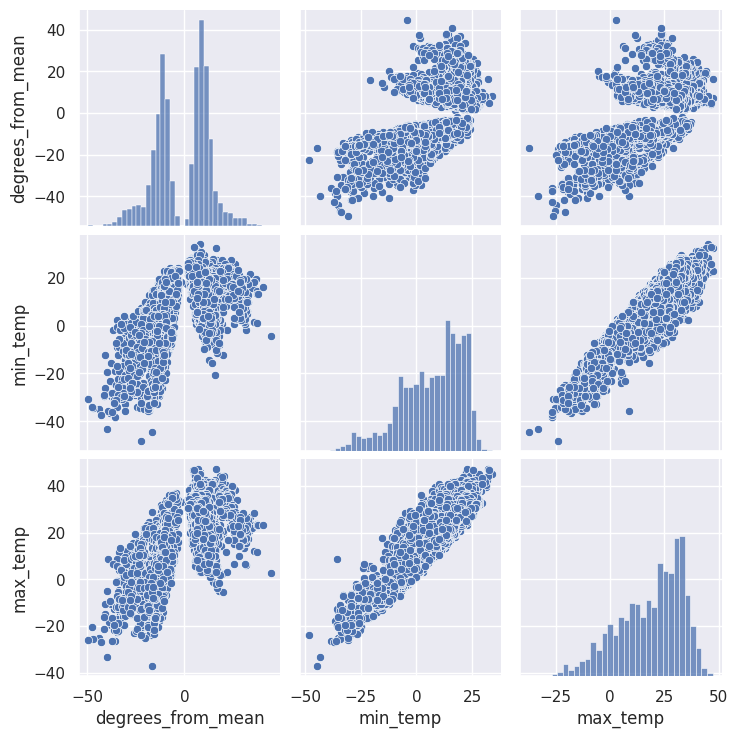

In [ ]:
sns.pairplot(df[["degrees_from_mean", "min_temp", "max_temp"]])
plt.show()

## Histogram Basics

Data: One quantitative variable

Creates "bins" (intervals) and counts how many values fall within each bin.

[Documentation (Pandas)](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.hist.html)

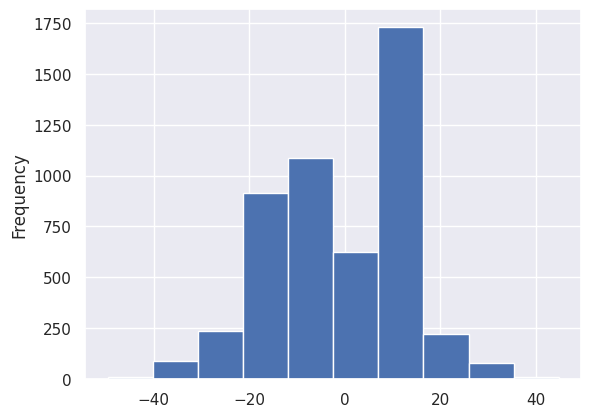

In [ ]:
# Histogram using pandas
df["degrees_from_mean"].plot.hist()
plt.show()

We can also use the matplotlib implementation to create the same plot.

[Documentation (matplotlib)](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html)

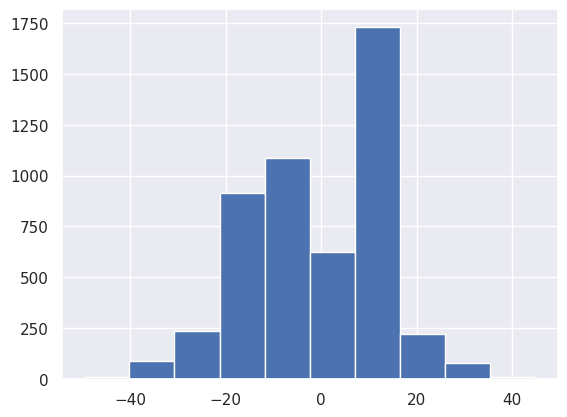

In [ ]:
# equivalently with matplotlib
plt.hist(df["degrees_from_mean"])
plt.show()

One important adjustable feature for histograms is the number and size of bins. We can do this by specifying the number of bins we want as an integer or the exact bins we would like as a list.

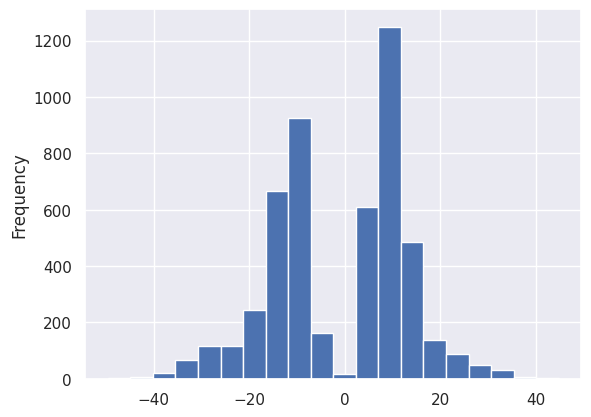

In [ ]:
# Specify histogram that has exactly 20 bins
df["degrees_from_mean"].plot.hist(bins=20)
plt.show()

In [ ]:
list(range(-4, 5))

[-4, -3, -2, -1, 0, 1, 2, 3, 4]

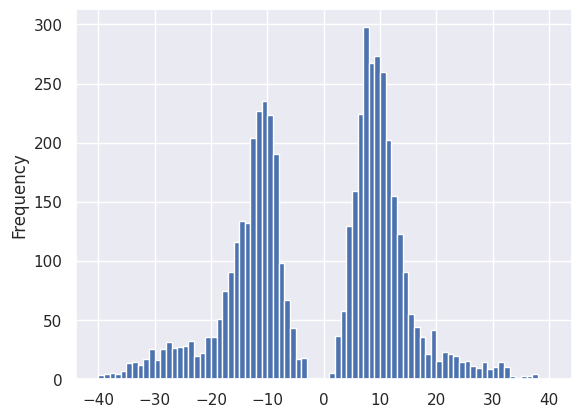

In [ ]:
# specify the cutoffs for each bin
df["degrees_from_mean"].plot.hist(bins=range(-40, 41))
plt.show()

## Bar Chart Basics

Data: One (or more) nominal or ordinal values

[Documentation (pandas)](https://pandas.pydata.org/docs/reference/api/pandas.Series.plot.bar.html)

In [ ]:
# Brief reminder of how value counts works
df["type"].value_counts()

Weak Hot       2334
Weak Cold      1952
Strong Cold     378
Strong Hot      336
Name: type, dtype: int64

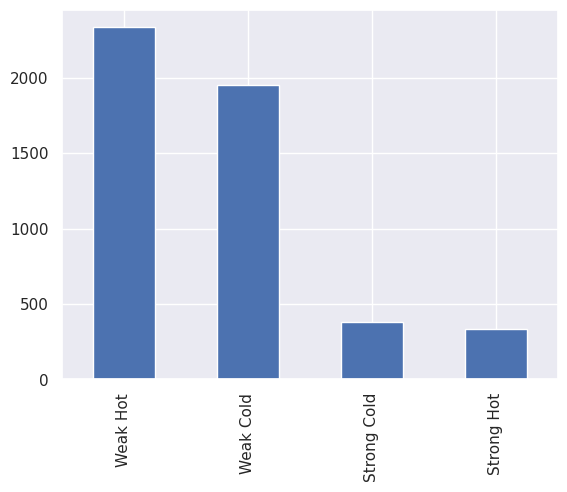

In [ ]:
# Plotting the bar chart with Pandas
df["type"].value_counts().plot.bar()
plt.show()

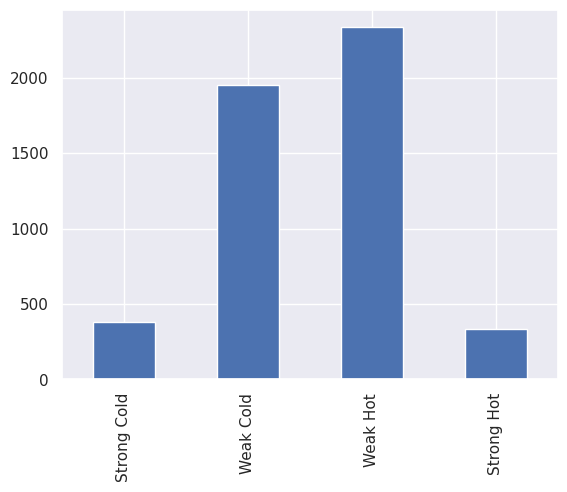

In [ ]:
# Modify the order of the bars to be in increasing order
df["type"].value_counts().loc[["Strong Cold", "Weak Cold", "Weak Hot", "Strong Hot"]].plot.bar()
plt.show()

This is slightly more clunky with matplotlib - we need to separate out the x values and the y values, which pandas does for us automatically.

[Documentation (matplotlib)](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html)

In [ ]:
# separating out bar labels
df["type"].value_counts().index

Index(['Weak Hot', 'Weak Cold', 'Strong Cold', 'Strong Hot'], dtype='object')

In [ ]:
# Separating out bar heights
df["type"].value_counts().values

array([2334, 1952,  378,  336])

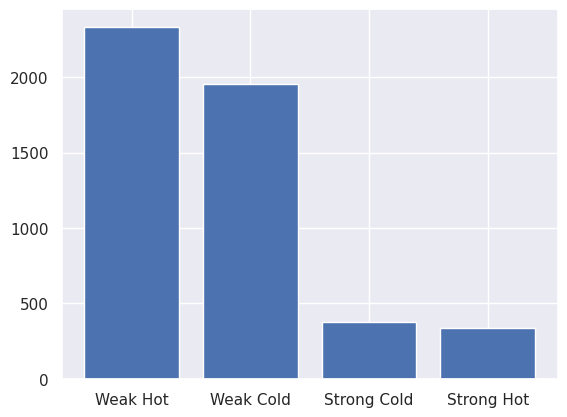

In [ ]:
# plot using matplotlib
plt.bar(df["type"].value_counts().index, df["type"].value_counts().values)
plt.show()

## Line Chart Basics

Data: Two (or more) quantitative variables

Plot x and y values, connected by a line.

[Documentation (pandas)](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html)

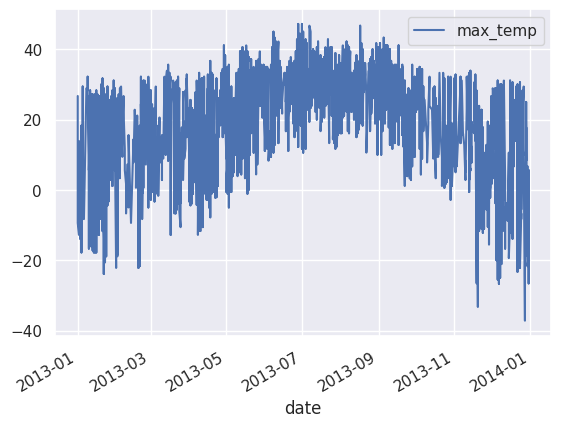

In [ ]:
# plotting directly from the dataframe using pandas
df.plot(x="date", y="max_temp")
plt.show()

Similarly, we can achieve the same outcome with matplotlib.

[Documentation (matplotlib)](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html)

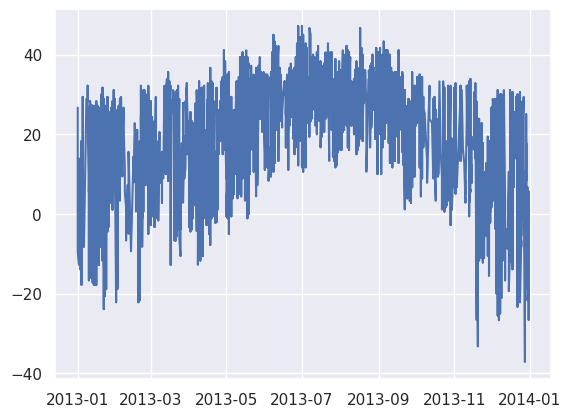

In [ ]:
# equivalent code with matplotlib
plt.plot(df["date"], df["max_temp"])
plt.show()

We can plot more than one variable at a time by listing more than 1 y-variable.

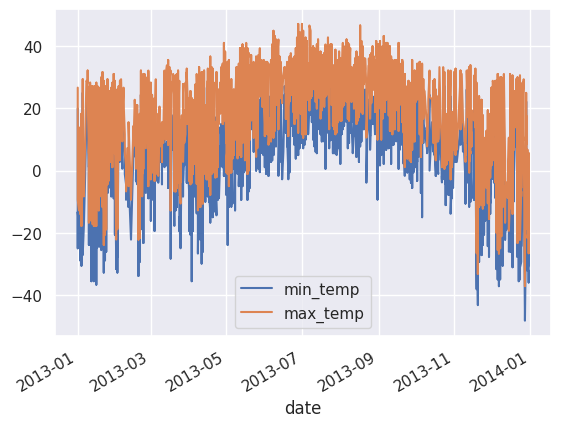

In [ ]:
# can plot more than one data series at a time
df.plot(x="date", y=["min_temp", "max_temp"])
plt.show()

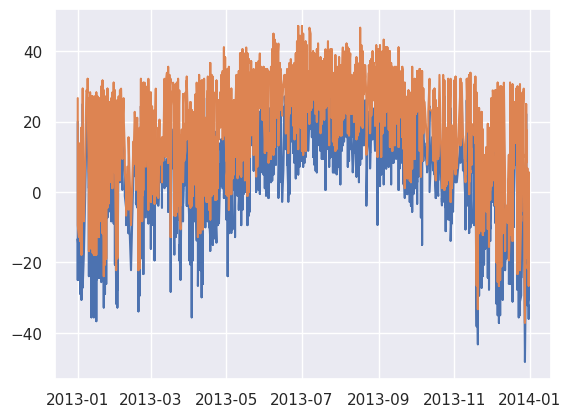

In [ ]:
# equivalently, two data series using matplotlib
plt.plot(df["date"], df["min_temp"])
plt.plot(df["date"], df["max_temp"])
plt.show()

## Scatterplot Basics

Data: Two (or more) quantitative variables

Essentially the same as a line chart, but without the line connecting data points.

[Documentation (pandas)](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.scatter.html)

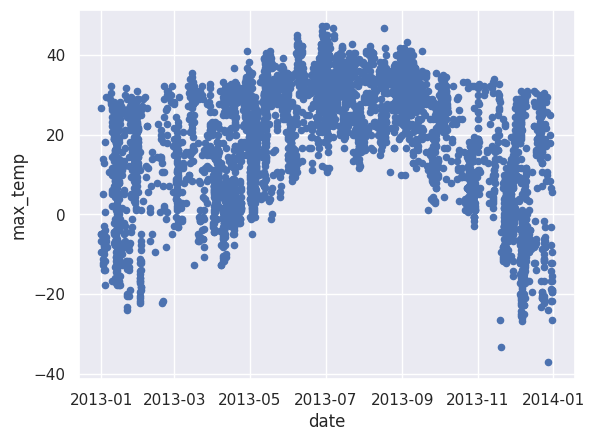

In [ ]:
# scatter plot using pandas
df.plot.scatter(x="date", y="max_temp")
plt.show()

[Documentation (matplotlib)](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html)

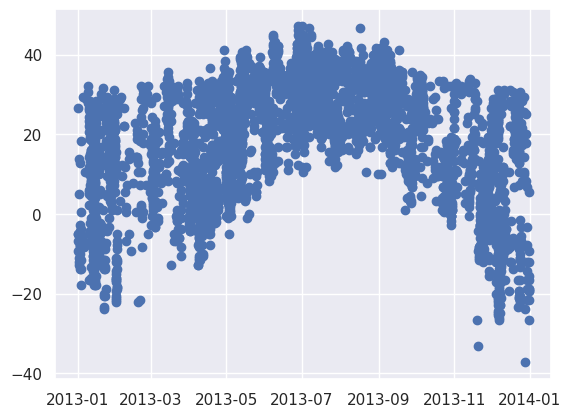

In [ ]:
# scatter plot using matplotlib
plt.scatter(df["date"], df["max_temp"])
plt.show()

We can also add multiple series on the same plot.

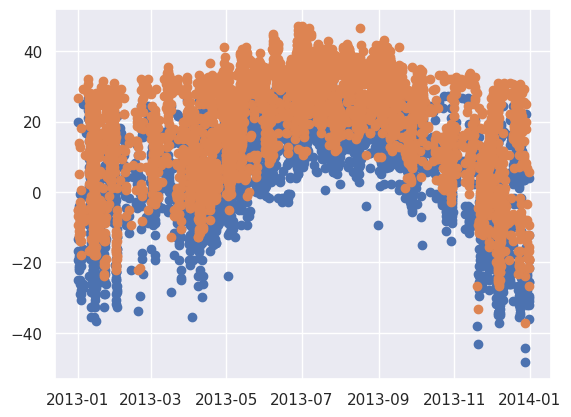

In [ ]:
# Plotting more than one data series using matplotlib
plt.scatter(df["date"], df["min_temp"])
plt.scatter(df["date"], df["max_temp"])
plt.show()

Pandas doesn't plot multiple series in a particularly clean way, but it does make it extremely easy to color the points using another column of data.

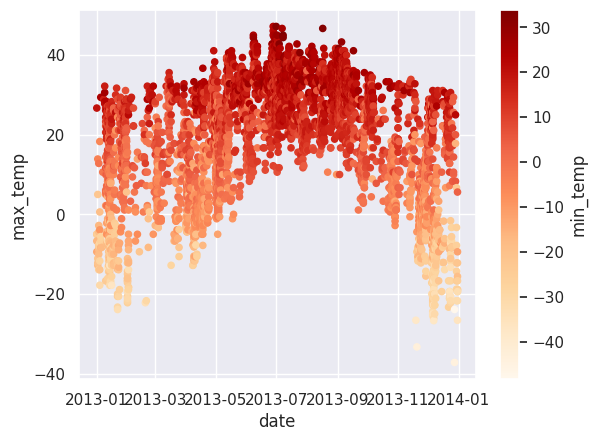

In [ ]:
# Use color to represent another column value in scatter plot with pandas
df.plot.scatter(x="date", y="max_temp", c="min_temp", cmap="OrRd")
plt.show()

## Heatmap Basics

Data: Two nominal or ordinal variables

Matplotlib itself doesn't have a heatmap implementation, but seaborn does.

[Documentation (seaborn)](https://seaborn.pydata.org/generated/seaborn.heatmap.html)

In [ ]:
# like with the histogram, first count the number of observations in each category
pd.crosstab(df["station_name"], df["type"])

type,Strong Cold,Strong Hot,Weak Cold,Weak Hot
station_name,,,,
ABERDEEN,0,0,2,0
ABERDEEN EXP STN,0,0,1,1
ABERDEEN PHILLIPS FLD,1,0,1,0
ABILENE RGNL AP,0,1,3,5
ABIQUIU DAM,1,0,4,0
...,...,...,...,...
YUMA,0,0,1,0
YUMA PROVING GROUND,0,0,0,1
ZANESVILLE MUNI AP,0,0,0,1


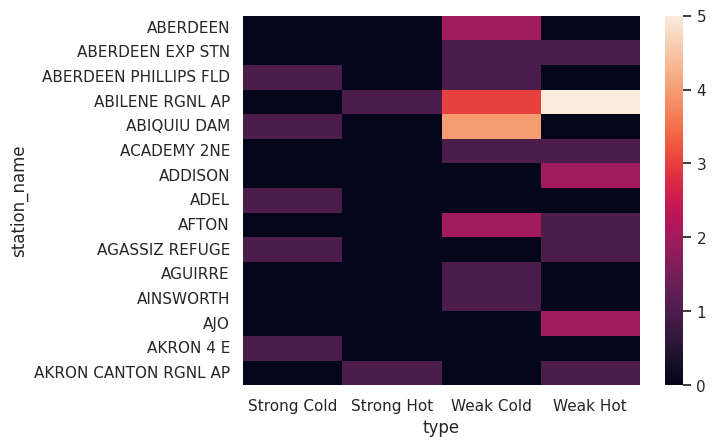

In [ ]:
# plot heatmap with seaborn
sns.heatmap(pd.crosstab(df["station_name"], df["type"]).head(15))
plt.show()